In [1]:
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Create a file path
filepath = "Documents/Bootcamps/April Bootcamp/Projects/project_1_group_01/data.csv"
# Read in the data.
df = pd.read_csv(filepath)
df.head()

,Card,Quantity,Pilot,Archetype,Event,Date Posted,Main/Sideboard,Mana Value,Mana Cost,Colours,Most Recent Printing,Card Text,Type Line,Price EUR,Price USD,Rarity
0,Hallowed Fountain,4,Pilot 1,Azorius Control,MTG China Open,2023-06-06,Mainboard,0.0,NaN,[],2019-01-25,({T}: Add {W} or {U}.)\r\nAs Hallowed Fountain...,Land — Plains Island,11.93,11.31,rare
1,Prairie Stream,2,Pilot 1,Azorius Control,MTG China Open,2023-06-06,Mainboard,0.0,NaN,[],2023-04-21,({T}: Add {W} or {U}.)\r\nPrairie Stream enter...,Land — Plains Island,0.21,0.16,rare
2,Irrigated Farmland,4,Pilot 1,Azorius Control,MTG China Open,2023-06-06,Mainboard,0.0,NaN,[],2020-04-17,({T}: Add {W} or {U}.)\r\nIrrigated Farmland e...,Land — Plains Island,0.76,0.96,rare
3,Field of Ruin,2,Pilot 1,Azorius Control,MTG China Open,2023-06-06,Mainboard,0.0,NaN,[],2023-04-21,"{T}: Add {C}.\r\n{2}, {T}, Sacrifice Field of ...",Land,0.05,0.15,uncommon
4,Fabled Passage,4,Pilot 1,Azorius Control,MTG China Open,2023-06-06,Mainboard,0.0,NaN,[],2020-07-03,"{T}, Sacrifice Fabled Passage: Search your lib...",Land,3.70,4.80,rare


In [3]:
#drop Date Posted column
df.drop(columns=["Date Posted"], inplace=True)

In [4]:
df.head()

,Card,Quantity,Pilot,Archetype,Event,Main/Sideboard,Mana Value,Mana Cost,Colours,Most Recent Printing,Card Text,Type Line,Price EUR,Price USD,Rarity
0,Hallowed Fountain,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,NaN,[],2019-01-25,({T}: Add {W} or {U}.)\r\nAs Hallowed Fountain...,Land — Plains Island,11.93,11.31,rare
1,Prairie Stream,2,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,NaN,[],2023-04-21,({T}: Add {W} or {U}.)\r\nPrairie Stream enter...,Land — Plains Island,0.21,0.16,rare
2,Irrigated Farmland,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,NaN,[],2020-04-17,({T}: Add {W} or {U}.)\r\nIrrigated Farmland e...,Land — Plains Island,0.76,0.96,rare
3,Field of Ruin,2,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,NaN,[],2023-04-21,"{T}: Add {C}.\r\n{2}, {T}, Sacrifice Field of ...",Land,0.05,0.15,uncommon
4,Fabled Passage,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,NaN,[],2020-07-03,"{T}, Sacrifice Fabled Passage: Search your lib...",Land,3.70,4.80,rare


In [5]:
#Drop Price EUR column
df.drop(columns=["Price EUR"], inplace=True)

In [6]:
df.head()

,Card,Quantity,Pilot,Archetype,Event,Main/Sideboard,Mana Value,Mana Cost,Colours,Most Recent Printing,Card Text,Type Line,Price USD,Rarity
0,Hallowed Fountain,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,NaN,[],2019-01-25,({T}: Add {W} or {U}.)\r\nAs Hallowed Fountain...,Land — Plains Island,11.31,rare
1,Prairie Stream,2,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,NaN,[],2023-04-21,({T}: Add {W} or {U}.)\r\nPrairie Stream enter...,Land — Plains Island,0.16,rare
2,Irrigated Farmland,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,NaN,[],2020-04-17,({T}: Add {W} or {U}.)\r\nIrrigated Farmland e...,Land — Plains Island,0.96,rare
3,Field of Ruin,2,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,NaN,[],2023-04-21,"{T}: Add {C}.\r\n{2}, {T}, Sacrifice Field of ...",Land,0.15,uncommon
4,Fabled Passage,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,NaN,[],2020-07-03,"{T}, Sacrifice Fabled Passage: Search your lib...",Land,4.80,rare


In [7]:
#separte artifacts from lands
df.loc[df["Type Line"].str.contains("Land"), "Colours"] = "['L']"

#remove null values from Lands
df.loc[df["Mana Cost"].isna(), "Mana Cost"] = "['L']"

df.head() #final clean version of the data set

,Card,Quantity,Pilot,Archetype,Event,Main/Sideboard,Mana Value,Mana Cost,Colours,Most Recent Printing,Card Text,Type Line,Price USD,Rarity
0,Hallowed Fountain,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2019-01-25,({T}: Add {W} or {U}.)\r\nAs Hallowed Fountain...,Land — Plains Island,11.31,rare
1,Prairie Stream,2,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2023-04-21,({T}: Add {W} or {U}.)\r\nPrairie Stream enter...,Land — Plains Island,0.16,rare
2,Irrigated Farmland,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2020-04-17,({T}: Add {W} or {U}.)\r\nIrrigated Farmland e...,Land — Plains Island,0.96,rare
3,Field of Ruin,2,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2023-04-21,"{T}: Add {C}.\r\n{2}, {T}, Sacrifice Field of ...",Land,0.15,uncommon
4,Fabled Passage,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2020-07-03,"{T}, Sacrifice Fabled Passage: Search your lib...",Land,4.80,rare


In [8]:
#This will drop null values from the Price USD column 
price_drop_df = df.dropna(subset=['Price USD'])

In [9]:
price_drop_df #the dataframe for the linregress

,Card,Quantity,Pilot,Archetype,Event,Main/Sideboard,Mana Value,Mana Cost,Colours,Most Recent Printing,Card Text,Type Line,Price USD,Rarity
0,Hallowed Fountain,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2019-01-25,({T}: Add {W} or {U}.)\r\nAs Hallowed Fountain...,Land — Plains Island,11.31,rare
1,Prairie Stream,2,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2023-04-21,({T}: Add {W} or {U}.)\r\nPrairie Stream enter...,Land — Plains Island,0.16,rare
2,Irrigated Farmland,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2020-04-17,({T}: Add {W} or {U}.)\r\nIrrigated Farmland e...,Land — Plains Island,0.96,rare
3,Field of Ruin,2,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2023-04-21,"{T}: Add {C}.\r\n{2}, {T}, Sacrifice Field of ...",Land,0.15,uncommon
4,Fabled Passage,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2020-07-03,"{T}, Sacrifice Fabled Passage: Search your lib...",Land,4.80,rare
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2301,The Chain Veil,1,Pilot 8,Mono-Green Devotion,MTG SEA Championship,Sideboard,4.0,{4},[],2014-07-18,"At the beginning of your end step, if you didn...",Legendary Artifact,26.69,mythic
2302,Tormod's Crypt,1,Pilot 8,Mono-Green Devotion,MTG SEA Championship,Sideboard,0.0,['L'],[],2020-07-03,"{T}, Sacrifice Tormod's Crypt: Exile target pl...",Artifact,0.24,uncommon
2303,Voracious Hydra,2,Pilot 8,Mono-Green Devotion,MTG SEA Championship,Sideboard,2.0,{X}{G}{G},['G'],2019-07-12,Trample\r\nVoracious Hydra enters the battlefi...,Creature — Hydra,4.21,rare
2304,Treasure Vault,1,Pilot 8,Mono-Green Devotion,MTG SEA Championship,Sideboard,0.0,['L'],['L'],2021-07-23,"{T}: Add {C}.\r\n{X}{X}, {T}, Sacrifice Treasu...",Artifact Land,4.78,rare


In [10]:
# count number of colors/color combinations and the number of each occurrance
colours = df['Colours'].value_counts()
print(colours)
print(type(colours))
# 23 variations as series. I don't see any null values or bad data.

Colours
['L']                   620
['B']                   273
[]                      272
['U']                   268
['W']                   266
['G']                   179
['R']                   171
['B', 'R']               76
['U', 'W']               61
['G', 'R']               29
['G', 'U']               24
['B', 'U']               14
['B', 'G']               10
['G', 'W']                8
['R', 'U']                7
['R', 'W']                5
['B', 'W']                5
['G', 'R', 'W']           4
['B', 'G', 'U']           4
['B', 'G', 'U', 'W']      4
['G', 'R', 'U', 'W']      3
['B', 'R', 'U']           1
['R', 'U', 'W']           1
['G', 'R', 'U']           1
Name: count, dtype: int64
<class 'pandas.core.series.Series'>


In [11]:
# Update 'Colours' column based on the condition 'Type Line' contains 'Land'
# This will differentiate between Lands and Artifacts, which are both colorless
df.loc[df["Type Line"].str.contains("Land"), "Colours"] = "['L']"
print(colours)

Colours
['L']                   620
['B']                   273
[]                      272
['U']                   268
['W']                   266
['G']                   179
['R']                   171
['B', 'R']               76
['U', 'W']               61
['G', 'R']               29
['G', 'U']               24
['B', 'U']               14
['B', 'G']               10
['G', 'W']                8
['R', 'U']                7
['R', 'W']                5
['B', 'W']                5
['G', 'R', 'W']           4
['B', 'G', 'U']           4
['B', 'G', 'U', 'W']      4
['G', 'R', 'U', 'W']      3
['B', 'R', 'U']           1
['R', 'U', 'W']           1
['G', 'R', 'U']           1
Name: count, dtype: int64


In [12]:
min_count = colours.min()
min_colours = colours[colours == min_count].index.tolist()
print(min_colours)

["['B', 'R', 'U']", "['R', 'U', 'W']", "['G', 'R', 'U']"]


In [13]:
colours = df['Colours'].value_counts()
total_cards = len(df)
percentage_used = (colours / total_cards) * 100
print(percentage_used)

Colours
['L']                   26.886383
['B']                   11.838682
[]                      11.795317
['U']                   11.621856
['W']                   11.535126
['G']                    7.762359
['R']                    7.415438
['B', 'R']               3.295750
['U', 'W']               2.645273
['G', 'R']               1.257589
['G', 'U']               1.040763
['B', 'U']               0.607112
['B', 'G']               0.433651
['G', 'W']               0.346921
['R', 'U']               0.303556
['R', 'W']               0.216826
['B', 'W']               0.216826
['G', 'R', 'W']          0.173461
['B', 'G', 'U']          0.173461
['B', 'G', 'U', 'W']     0.173461
['G', 'R', 'U', 'W']     0.130095
['B', 'R', 'U']          0.043365
['R', 'U', 'W']          0.043365
['G', 'R', 'U']          0.043365
Name: count, dtype: float64


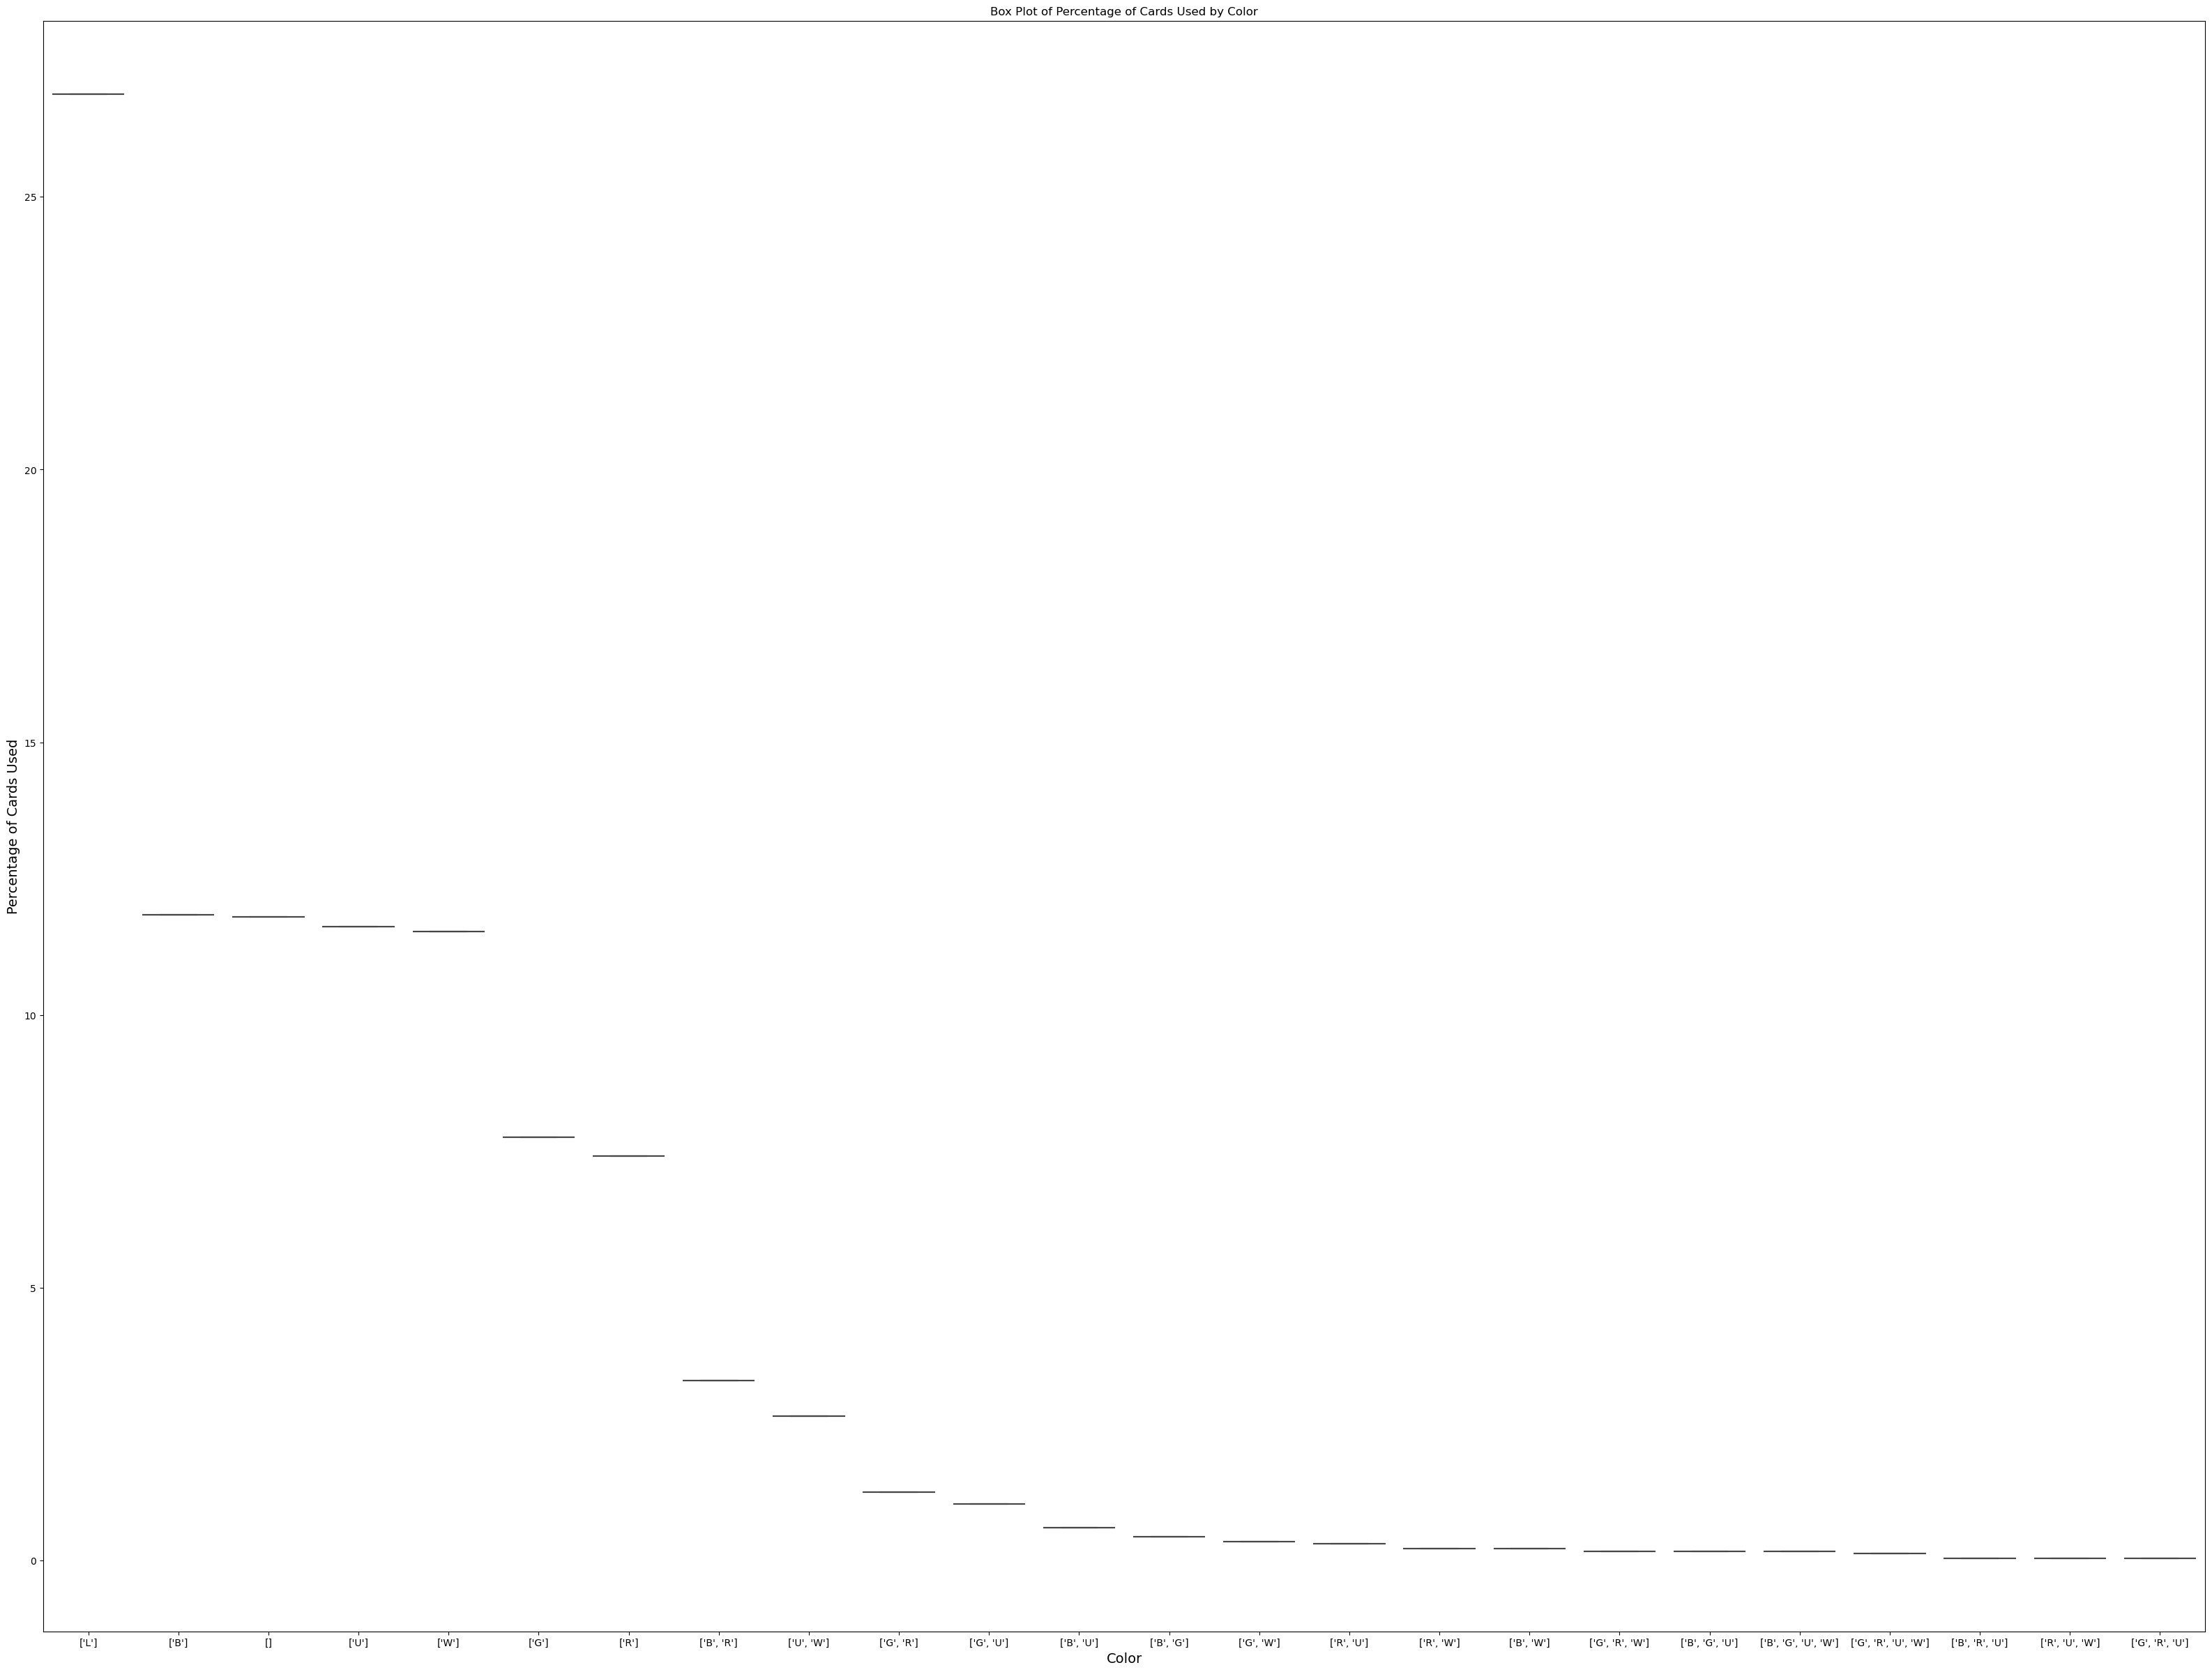

In [44]:
plt.figure(figsize=(40, 30 ))
colours = df['Colours'].value_counts()
total_cards = len(df)
percentage_used = (colours / total_cards) * 100
data = pd.DataFrame({'Color': colours.index, 'percentage_used': percentage_used.values})
sns.boxplot(x='Color', y='percentage_used',data=data)
plt.title('Box Plot of Percentage of Cards Used by Color')
plt.xlabel('Color', fontsize=14)
plt.ylabel('Percentage of Cards Used' , fontsize=14)
plt.show()

C:\Users\elewis\AppData\Local\Temp\ipykernel_20100\3454567409.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_yticklabels(barplot.get_yticklabels(), fontsize=14)  # Set the desired font size for x-axis tick labels


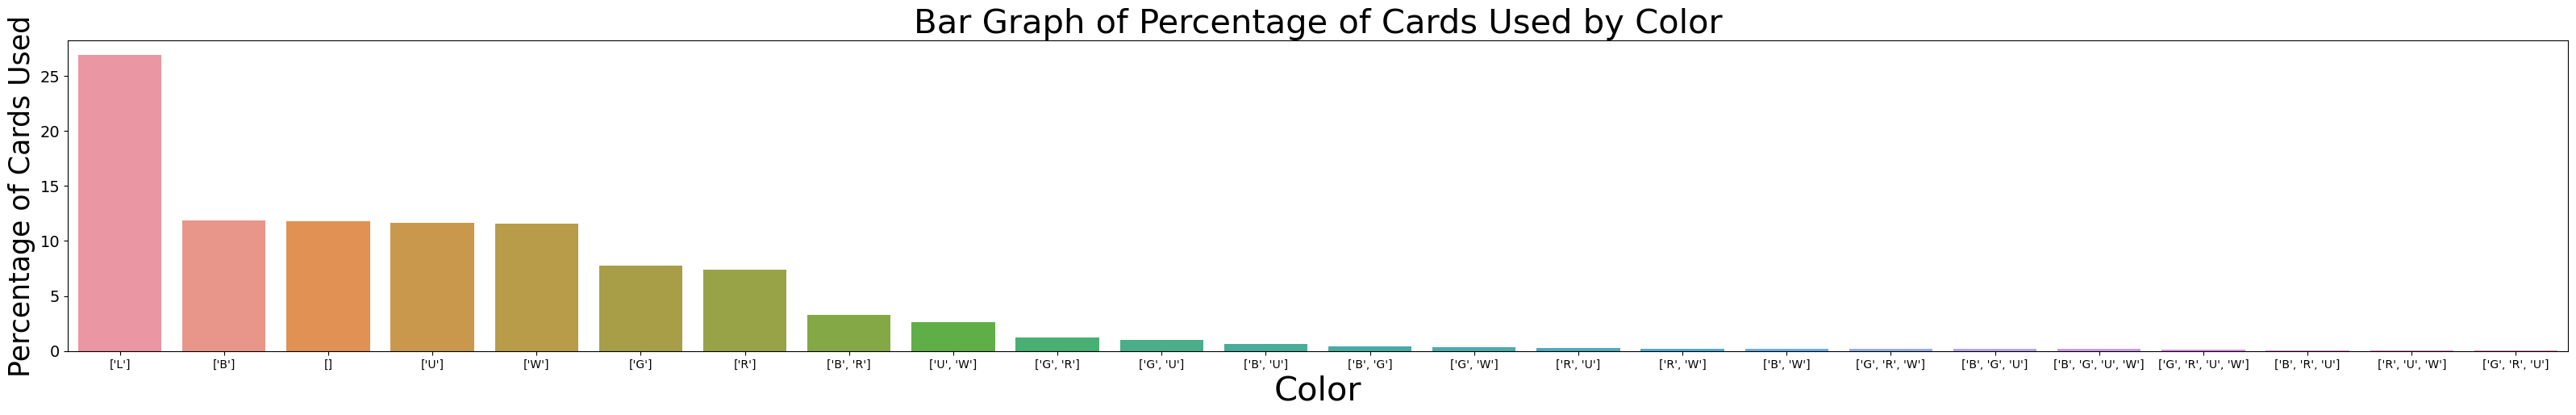

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(40, 5))

colours = df['Colours'].value_counts()
total_cards = len(df)
percentage_used = (colours / total_cards) * 100
data = pd.DataFrame({'Color': colours.index, 'percentage_used': percentage_used.values})

# Create the box plot
barplot = sns.barplot(x='Color', y='percentage_used', data=data)

# Adjust the font size of the x-axis labels
barplot.set_xlabel('Color', fontsize=30)  # Set the desired font size

# Change the x-axis tick label font size
barplot.set_xticklabels(barplot.get_xticklabels(), fontsize=10)  # Set the desired font size for x-axis tick labels
barplot.set_yticklabels(barplot.get_yticklabels(), fontsize=14)  # Set the desired font size for x-axis tick labels
plt.title('Bar Graph of Percentage of Cards Used by Color', fontsize=30)
plt.ylabel('Percentage of Cards Used', fontsize=25)


plt.savefig('linear_regression_plot.svg', format='svg')

In [ ]:
df.info()

In [ ]:
card_count = len(df["Card"].unique())

In [ ]:
card_count

In [ ]:
cards = df['Card'].unique()
cards_list = cards.tolist()

In [ ]:
cards

In [ ]:
mana_value = len(df["Mana Value"].unique())

In [ ]:
mana_value

In [ ]:
mana_v = df['Mana Value'].unique()
mana_v_list = mana_v.tolist()

In [ ]:
mana_v

In [ ]:
colours = len(df["Colours"].unique())

In [ ]:
colours

In [ ]:
colours_list = df['Colours'].unique()
colours_list_list = colours_list.tolist()

In [ ]:
colours_list

In [ ]:
mana_cost = len(df["Mana Cost"].unique())

In [ ]:
mana_cost

In [ ]:
mana_c = df['Mana Cost'].unique()
mana_c_list = mana_c.tolist()

In [ ]:
mana_c

In [ ]:
player = len(df["Pilot"].unique())

In [ ]:
player

In [ ]:
pilot = df['Pilot'].unique()
pilot_list = pilot.tolist()

In [ ]:
pilot

In [ ]:
archetype = len(df["Archetype"].unique())

In [ ]:
archetype

In [ ]:
archetype_l = df['Archetype'].unique()
pilot_list = archetype_l.tolist()

In [ ]:
archetype_l

In [ ]:
event = len(df["Event"].unique())

In [ ]:
event

In [ ]:
event_l = df['Event'].unique()
event_list = event_l.tolist()

In [ ]:
event_l

In [ ]:
printing = len(df["Most Recent Printing"].unique())

In [ ]:
printing

In [ ]:
printing_l = df['Most Recent Printing'].unique()
printing_list = printing_l.tolist()

In [ ]:
printing_list

In [ ]:
type = len(df["Type Line"].unique())

In [ ]:
type

In [ ]:
type_l = df['Type Line'].unique()
type_l_list = type_l.tolist()

In [ ]:
type_l

In [ ]:
rare = len(df["Rarity"].unique())

In [ ]:
rare

In [ ]:
rare_l = df['Rarity'].unique()
rare_list = rare_l.tolist()

In [ ]:
rare_list

In [ ]:
# Step 1: Get the Data
x = df.Event
y = df.Archetype

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="firebrick", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Event", fontsize=12, fontstyle="italic")
plt.ylabel("Archetype", fontsize=12, fontstyle="italic")
plt.title("Event vs Archetype", fontweight="bold", fontsize=16)
# Save the figure
#plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

In [ ]:
df.info()

In [ ]:
df["Printing Dates"]=pd.to_datetime(df["Most Recent Printing"])

In [ ]:
df.info()

In [ ]:
today = pd.Timestamp("2024-06-03")

In [ ]:
df["Printing Age"] = (today-df["Printing Dates"]).dt.days
df.head()

In [ ]:
df.corr(numeric_only=True)